In [2]:
###Data Collection
import pandas_datareader as pdr
key="73a417c121109bc35800c042cffb64848c077318"

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-01-13 00:00:00+00:00,119.04,119.62,118.8100,119.11,26111948,28.009183,28.145653,27.955066,28.025654,104447792,0.0,1.0
1,AAPL,2017-01-17 00:00:00+00:00,120.00,120.24,118.2200,118.34,34439843,28.235064,28.291534,27.816243,27.844479,137759372,0.0,1.0
2,AAPL,2017-01-18 00:00:00+00:00,119.99,120.50,119.7100,120.00,23712961,28.232711,28.352710,28.166829,28.235064,94851844,0.0,1.0
3,AAPL,2017-01-19 00:00:00+00:00,119.78,120.09,119.3700,119.40,25597291,28.183299,28.256240,28.086830,28.093888,102389164,0.0,1.0
4,AAPL,2017-01-20 00:00:00+00:00,120.00,120.45,119.7346,120.45,32597892,28.235064,28.340945,28.172617,28.340945,130391568,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1.shape

(1258,)

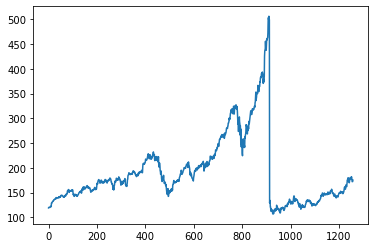

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
df1

0       119.04
1       120.00
2       119.99
3       119.78
4       120.00
         ...  
1253    174.92
1254    172.00
1255    172.17
1256    172.19
1257    175.08
Name: close, Length: 1258, dtype: float64

In [16]:
import numpy as np

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
df1.shape

(1258, 1)

In [82]:
df1

array([[0.03055729],
       [0.0329618 ],
       [0.03293676],
       ...,
       [0.16363181],
       [0.1636819 ],
       [0.17092048]])

In [24]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]

In [25]:
train_data

array([[0.03055729],
       [0.0329618 ],
       [0.03293676],
       [0.03241077],
       [0.0329618 ],
       [0.03316218],
       [0.03288666],
       [0.03767063],
       [0.03782091],
       [0.03784596],
       [0.03704446],
       [0.03634314],
       [0.0548779 ],
       [0.05432686],
       [0.05570445],
       [0.05873513],
       [0.06184095],
       [0.06311835],
       [0.06407013],
       [0.06331872],
       [0.06624922],
       [0.07058234],
       [0.07180964],
       [0.07139637],
       [0.07233563],
       [0.07479023],
       [0.07581716],
       [0.07436443],
       [0.07469004],
       [0.07536631],
       [0.07551659],
       [0.08252974],
       [0.08045085],
       [0.0825047 ],
       [0.08140263],
       [0.08185348],
       [0.08055103],
       [0.07974953],
       [0.08090169],
       [0.08105197],
       [0.08052599],
       [0.08420789],
       [0.08478397],
       [0.08303068],
       [0.08671259],
       [0.08265498],
       [0.0866124 ],
       [0.085

In [91]:
len(train_data),len(test_data)

(817, 441)

In [26]:
test_data

array([[4.44809017e-01],
       [4.50469631e-01],
       [4.40726362e-01],
       [4.26023795e-01],
       [4.04583594e-01],
       [4.23944897e-01],
       [4.21264872e-01],
       [4.41152160e-01],
       [4.41653100e-01],
       [4.30156544e-01],
       [4.53074515e-01],
       [4.68278021e-01],
       [4.56430808e-01],
       [4.66675016e-01],
       [4.77695679e-01],
       [4.85385097e-01],
       [4.93174703e-01],
       [5.09179712e-01],
       [5.21402630e-01],
       [5.12385723e-01],
       [5.02968065e-01],
       [5.07701941e-01],
       [5.03118347e-01],
       [5.21277395e-01],
       [5.16718848e-01],
       [5.31972448e-01],
       [5.26011271e-01],
       [5.31120852e-01],
       [5.25710708e-01],
       [5.29167188e-01],
       [5.29517846e-01],
       [5.28741390e-01],
       [5.38534753e-01],
       [5.42266750e-01],
       [5.46725110e-01],
       [5.39711960e-01],
       [5.62705072e-01],
       [5.67614277e-01],
       [5.93988729e-01],
       [6.16155291e-01],


In [63]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [64]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [65]:
len(X_train)

716

In [66]:
X_train[0]

array([0.03055729, 0.0329618 , 0.03293676, 0.03241077, 0.0329618 ,
       0.03316218, 0.03288666, 0.03767063, 0.03782091, 0.03784596,
       0.03704446, 0.03634314, 0.0548779 , 0.05432686, 0.05570445,
       0.05873513, 0.06184095, 0.06311835, 0.06407013, 0.06331872,
       0.06624922, 0.07058234, 0.07180964, 0.07139637, 0.07233563,
       0.07479023, 0.07581716, 0.07436443, 0.07469004, 0.07536631,
       0.07551659, 0.08252974, 0.08045085, 0.0825047 , 0.08140263,
       0.08185348, 0.08055103, 0.07974953, 0.08090169, 0.08105197,
       0.08052599, 0.08420789, 0.08478397, 0.08303068, 0.08671259,
       0.08265498, 0.0866124 , 0.08536005, 0.08465874, 0.08525986,
       0.09257358, 0.09337508, 0.09289919, 0.09222292, 0.09232311,
       0.09500313, 0.09312461, 0.09222292, 0.09142142, 0.09099562,
       0.08713838, 0.08756418, 0.08568566, 0.08763932, 0.08606137,
       0.08475892, 0.08916719, 0.08874139, 0.09217282, 0.094402  ,
       0.09227301, 0.09254853, 0.09219787, 0.09953663, 0.10186

In [55]:
len(X_test)

340

In [56]:
X_train.shape

(716, 100)

In [57]:
X_train.shape[0]

716

In [67]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [68]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [69]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 816ms/step - loss: 0.0144 - val_loss: 0.0063
Epoch 2/100
12/12 [==============================] - 3s 290ms/step - loss: 0.0043 - val_loss: 0.0158
Epoch 3/100
12/12 [==============================] - 4s 349ms/step - loss: 0.0019 - val_loss: 0.0144
Epoch 4/100
12/12 [==============================] - 4s 352ms/step - loss: 0.0012 - val_loss: 0.0143
Epoch 5/100
12/12 [==============================] - 3s 272ms/step - loss: 0.0010 - val_loss: 0.0137
Epoch 6/100
12/12 [==============================] - 4s 293ms/step - loss: 9.4477e-04 - val_loss: 0.0111
Epoch 7/100
12/12 [==============================] - 5s 445ms/step - loss: 8.6094e-04 - val_loss: 0.0099
Epoch 8/100
12/12 [==============================] - 4s 297ms/step - loss: 8.5426e-04 - val_loss: 0.0099
Epoch 9/100
12/12 [==============================] - 4s 311ms/step - loss: 7.5446e-04 - val_loss: 0.0082
Epoch 10/100
12/12 [==============================] - 5s 379ms/step - loss

12/12 [==============================] - 4s 367ms/step - loss: 2.8688e-04 - val_loss: 0.0011
Epoch 79/100
12/12 [==============================] - 4s 346ms/step - loss: 2.8901e-04 - val_loss: 0.0012
Epoch 80/100
12/12 [==============================] - 5s 440ms/step - loss: 2.8648e-04 - val_loss: 0.0012
Epoch 81/100
12/12 [==============================] - 4s 310ms/step - loss: 2.9781e-04 - val_loss: 0.0012
Epoch 82/100
12/12 [==============================] - 3s 289ms/step - loss: 2.8249e-04 - val_loss: 0.0011
Epoch 83/100
12/12 [==============================] - 5s 392ms/step - loss: 2.8612e-04 - val_loss: 0.0011
Epoch 84/100
12/12 [==============================] - 4s 331ms/step - loss: 2.6855e-04 - val_loss: 0.0012
Epoch 85/100
12/12 [==============================] - 4s 349ms/step - loss: 2.9981e-04 - val_loss: 0.0010
Epoch 86/100
12/12 [==============================] - 3s 283ms/step - loss: 3.3272e-04 - val_loss: 9.9186e-04
Epoch 87/100
12/12 [==============================] - 4

In [76]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [90]:
len(train_predict),len(test_predict)

(716, 340)

In [77]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [78]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

201.18560805168656

In [79]:
math.sqrt(mean_squared_error(ytest,test_predict))

138.31653550893478

In [93]:
look_back=100
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict

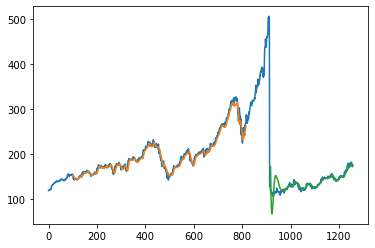

In [96]:
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [97]:
# To predict future price

In [115]:
len(test_data),test_data.shape

(441, (441, 1))

In [114]:
test_data

array([[4.44809017e-01],
       [4.50469631e-01],
       [4.40726362e-01],
       [4.26023795e-01],
       [4.04583594e-01],
       [4.23944897e-01],
       [4.21264872e-01],
       [4.41152160e-01],
       [4.41653100e-01],
       [4.30156544e-01],
       [4.53074515e-01],
       [4.68278021e-01],
       [4.56430808e-01],
       [4.66675016e-01],
       [4.77695679e-01],
       [4.85385097e-01],
       [4.93174703e-01],
       [5.09179712e-01],
       [5.21402630e-01],
       [5.12385723e-01],
       [5.02968065e-01],
       [5.07701941e-01],
       [5.03118347e-01],
       [5.21277395e-01],
       [5.16718848e-01],
       [5.31972448e-01],
       [5.26011271e-01],
       [5.31120852e-01],
       [5.25710708e-01],
       [5.29167188e-01],
       [5.29517846e-01],
       [5.28741390e-01],
       [5.38534753e-01],
       [5.42266750e-01],
       [5.46725110e-01],
       [5.39711960e-01],
       [5.62705072e-01],
       [5.67614277e-01],
       [5.93988729e-01],
       [6.16155291e-01],


In [109]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [120]:
x_input

array([[0.10356919, 0.10737633, 0.10715091, 0.10399499, 0.10194114,
        0.10459612, 0.11591735, 0.11268629, 0.11438948, 0.11724483,
        0.11887289, 0.12485911, 0.12090169, 0.11829681, 0.10552286,
        0.10697558, 0.10339386, 0.10567314, 0.10507201, 0.09823419,
        0.09041954, 0.09164684, 0.0977082 , 0.10016281, 0.10038823,
        0.09650595, 0.0878397 , 0.09014402, 0.08681277, 0.08969317,
        0.08090169, 0.08583594, 0.08806512, 0.09129618, 0.09031935,
        0.09009393, 0.08683782, 0.085335  , 0.09247339, 0.09517846,
        0.09946149, 0.10499687, 0.10624922, 0.10680025, 0.10482154,
        0.10469631, 0.1063995 , 0.10522229, 0.11453976, 0.10760175,
        0.10549781, 0.10815279, 0.11183469, 0.1105072 , 0.1113087 ,
        0.10920476, 0.1101315 , 0.10289292, 0.10276769, 0.10807765,
        0.10810269, 0.11060739, 0.11684408, 0.12781465, 0.13452724,
        0.13570445, 0.13668128, 0.13800877, 0.12515967, 0.13375078,
        0.14642455, 0.14509706, 0.14256731, 0.13

In [123]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [124]:
temp_input

[0.10356919223544142,
 0.10737633061991231,
 0.10715090795241072,
 0.10399499060738887,
 0.101941139636819,
 0.1045961177207263,
 0.11591734502191609,
 0.11268628678772696,
 0.11438948027551654,
 0.11724483406386971,
 0.11887288666249218,
 0.12485911083281148,
 0.12090169067000628,
 0.11829680651221036,
 0.1055228553537883,
 0.10697557921102063,
 0.10339386349405133,
 0.10567313713212267,
 0.10507201001878513,
 0.09823418910457105,
 0.0904195366311834,
 0.0916468378209142,
 0.09770820288040072,
 0.10016280525986221,
 0.10038822792736374,
 0.09650594865372569,
 0.08783969943644326,
 0.09014402003757044,
 0.08681277395115838,
 0.08969317470256727,
 0.08090169067000619,
 0.08583594239198494,
 0.08806512210394485,
 0.09129618033813391,
 0.09031934877896053,
 0.09009392611145894,
 0.0868378209142141,
 0.08533500313087033,
 0.09247338760175322,
 0.09517845961177201,
 0.09946149029430179,
 0.10499686912961798,
 0.10624921728240444,
 0.10680025046963049,
 0.10482154038822789,
 0.10469630557294

In [129]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
     
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)
        

0 day input [0.11591735 0.11268629 0.11438948 0.11724483 0.11887289 0.12485911
 0.12090169 0.11829681 0.10552286 0.10697558 0.10339386 0.10567314
 0.10507201 0.09823419 0.09041954 0.09164684 0.0977082  0.10016281
 0.10038823 0.09650595 0.0878397  0.09014402 0.08681277 0.08969317
 0.08090169 0.08583594 0.08806512 0.09129618 0.09031935 0.09009393
 0.08683782 0.085335   0.09247339 0.09517846 0.09946149 0.10499687
 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229
 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072
 0.1113087  0.10920476 0.1101315  0.10289292 0.10276769 0.10807765
 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724 0.13570445
 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455 0.14509706
 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048 0.16961803
 0.181866   0.17257358 0.16904195 0.18149029 0.16385723 0.16105197
 0.15757044 0.16568566 0.17232311 0.17392611 0.18407013 0.18146525
 0.18169067 0.17873513 0.17715717 0.18827802 0.1824

8 day output [[0.14950335]]
9 day input [0.10697558 0.10339386 0.10567314 0.10507201 0.09823419 0.09041954
 0.09164684 0.0977082  0.10016281 0.10038823 0.09650595 0.0878397
 0.09014402 0.08681277 0.08969317 0.08090169 0.08583594 0.08806512
 0.09129618 0.09031935 0.09009393 0.08683782 0.085335   0.09247339
 0.09517846 0.09946149 0.10499687 0.10624922 0.10680025 0.10482154
 0.10469631 0.1063995  0.10522229 0.11453976 0.10760175 0.10549781
 0.10815279 0.11183469 0.1105072  0.1113087  0.10920476 0.1101315
 0.10289292 0.10276769 0.10807765 0.10810269 0.11060739 0.11684408
 0.12781465 0.13452724 0.13570445 0.13668128 0.13800877 0.12515967
 0.13375078 0.14642455 0.14509706 0.14256731 0.1377583  0.14647464
 0.16115216 0.17092048 0.16961803 0.181866   0.17257358 0.16904195
 0.18149029 0.16385723 0.16105197 0.15757044 0.16568566 0.17232311
 0.17392611 0.18407013 0.18146525 0.18169067 0.17873513 0.17715717
 0.18827802 0.18249217 0.17051972 0.16320601 0.16363181 0.1636819
 0.17092048 0.16620436 0.

17 day output [[0.14385764]]
18 day input [0.10038823 0.09650595 0.0878397  0.09014402 0.08681277 0.08969317
 0.08090169 0.08583594 0.08806512 0.09129618 0.09031935 0.09009393
 0.08683782 0.085335   0.09247339 0.09517846 0.09946149 0.10499687
 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229
 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072
 0.1113087  0.10920476 0.1101315  0.10289292 0.10276769 0.10807765
 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724 0.13570445
 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455 0.14509706
 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048 0.16961803
 0.181866   0.17257358 0.16904195 0.18149029 0.16385723 0.16105197
 0.15757044 0.16568566 0.17232311 0.17392611 0.18407013 0.18146525
 0.18169067 0.17873513 0.17715717 0.18827802 0.18249217 0.17051972
 0.16320601 0.16363181 0.1636819  0.17092048 0.16620436 0.16415404
 0.16247818 0.16103068 0.15971385 0.15847448 0.157289   0.15614982
 0.15505643 0.1540102

26 day output [[0.13983943]]
27 day input [0.09129618 0.09031935 0.09009393 0.08683782 0.085335   0.09247339
 0.09517846 0.09946149 0.10499687 0.10624922 0.10680025 0.10482154
 0.10469631 0.1063995  0.10522229 0.11453976 0.10760175 0.10549781
 0.10815279 0.11183469 0.1105072  0.1113087  0.10920476 0.1101315
 0.10289292 0.10276769 0.10807765 0.10810269 0.11060739 0.11684408
 0.12781465 0.13452724 0.13570445 0.13668128 0.13800877 0.12515967
 0.13375078 0.14642455 0.14509706 0.14256731 0.1377583  0.14647464
 0.16115216 0.17092048 0.16961803 0.181866   0.17257358 0.16904195
 0.18149029 0.16385723 0.16105197 0.15757044 0.16568566 0.17232311
 0.17392611 0.18407013 0.18146525 0.18169067 0.17873513 0.17715717
 0.18827802 0.18249217 0.17051972 0.16320601 0.16363181 0.1636819
 0.17092048 0.16620436 0.16415404 0.16247818 0.16103068 0.15971385
 0.15847448 0.157289   0.15614982 0.15505643 0.15401024 0.15301259
 0.15206398 0.15116385 0.15031092 0.14950335 0.14873889 0.14801508
 0.14732923 0.14667864

In [131]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

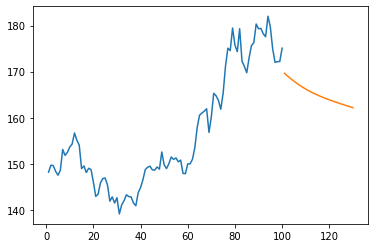

In [132]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))